In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]        # petal length and width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [2]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

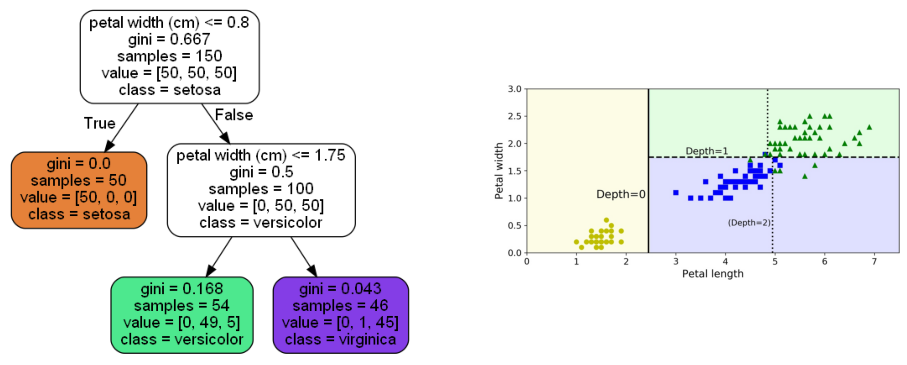

In [3]:
# visualize trained tree
from sklearn.tree import export_graphviz

filename = 'models/iris_tree.dot'
import os
if not os.path.exists(filename):                # create graphviz file if absent
    export_graphviz(
        tree_clf,
        out_file = filename,                    # save tree to .dot file
        feature_names = iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True,
        filled = True
    )
# convert .dot file to .png with command-line command <dot -Tpng iris_tree.dot -o iris_tree.png>
# if needed, install open-source graphviz package from https://www.graphviz.org/:
# --> to download stable 64-bit windows10 package go to https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/
# --> at install: add path for all users
# --> post-install: run <dot -c> from command line *as administrator* to install plugins (for image formats)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
img = mpimg.imread('models/iris_tree.png')
ax[0].imshow(img)
ax[0].axis('off')

img = mpimg.imread('decision_tree_boundaries.png')
ax[1].imshow(img)
ax[1].axis('off')

plt.show()

In [4]:
# tree (with max_depth=2) is built starting at depth=0 with root node and impurity=0.667 over the whole sample size 150
# --> 1st partitioning is done at depth=1 based on petal width<=0.8cm:
#     --> leaf node (pure node with impurity=0) consists of 50 samples and class/species=setosa
#     --> child node (gini=0.5) consists of remaining 100 samples with petal width>0.8cm and mixed classes
# --> 2nd partitioning (of child node) is done at depth=2 based on petal width<=1.75cm:
#     --> two child nodes are created for class=versicolor (sample size 54, gini=0.168) and class=virginica (sample size 46, gini=0.043)

# to identify (make prediction about) the species of a random Iris flower:
# --> start with root node and ask if its petal width<=0.8cm
# --> if yes, it is of species setosa
# --> if no, ask if its petal width<=1.75cm
# --> if yes, it is of species versicolor
# --> if no, it is of species virginica